<a href="https://colab.research.google.com/github/veronica1013/machine_learning/blob/main/Linear_regression_intro_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples
We will now perform our first predictions. Consider [this data set](https://drive.google.com/file/d/13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d/view?usp=sharing) which tracks various information about grad school applicants, as well as their percentage chance of admission to grad school.

Our aim will be to predict one's chance of getting into grad school. Let's begin by taking a look at the data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the data
data = pd.read_csv('uni_admission.csv')

#displaying the dataset
data.shape

(500, 9)

You should see 500 entries, and 9 columns. Let's also get a description of the data

In [2]:
data.describe()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Let's start by focusing on a single variable: the GRE score 

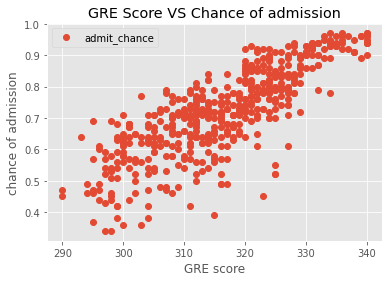

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x1='GRE'
y1='admit_chance'

data.plot(x=x1, y=y1, style='o')
plt.title('GRE Score VS Chance of admission')
plt.xlabel('GRE score')
plt.ylabel('chance of admission')
plt.show()



In [4]:
# Set the y and x variable
# x = data['data']
y = data['admit_chance']

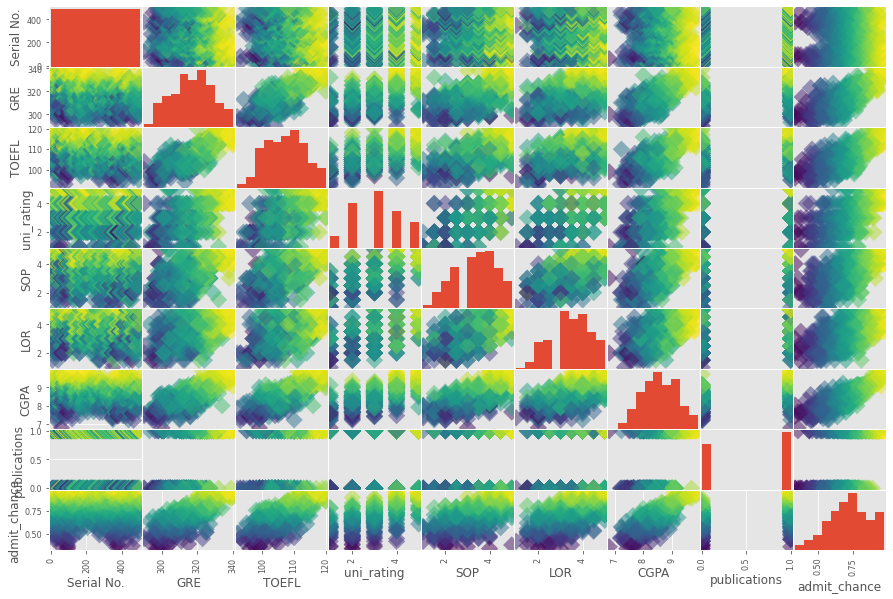

In [5]:
plt.style.use('ggplot')
# Perform Exploratory Data Analysis to compare the variables
# Plot a scatter plot
_ = pd.plotting.scatter_matrix(data, c = y, figsize=[15,10], s=150, marker='D')

We can clearly see that there is a relationship between GRE scores and chances of admission. While there are some outliers, we will now build a linear regression model to predict admission chance based on GRE results. First, we set up our train and test datasets

In [6]:
# Set up the train and test data sets
from sklearn.model_selection import train_test_split

X = data['GRE'].values.reshape(-1, 1)
y = data['admit_chance'].values#.reshape(-1, 1)

# Use 20% of the data as test
# The rest will be our training set
GRE_train, GRE_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)


This should be familiar so far, time to actually create the model. We will create a regressor object, and train it using our train data

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(GRE_train, admit_train)

#The fit method will look for our optimal line. More info on this method and others
# at the official documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-2.5488126924084584
[0.01033718]


How good is our newly fitted model? Let's feed it the data we saved for testing. We will have the model predict chances of admission based on those GRE scores we set aside, then compare that to the actual chances from the original dataset.

In [8]:
admit_predict = regressor.predict(GRE_test)

comparison_frame = pd.DataFrame({'Actual': admit_test.flatten(), 'Predicted': admit_predict.flatten()})

comparison_frame.describe()
  

,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.706884
std,0.13282,0.115189
min,0.39000,0.500657
25%,0.60000,0.614366
50%,0.70500,0.717738
75%,0.80000,0.800435
max,0.96000,0.945156


Our model is not too bad, although you can see that it can be off, as with the min value. Let's visualize it for a better intuition

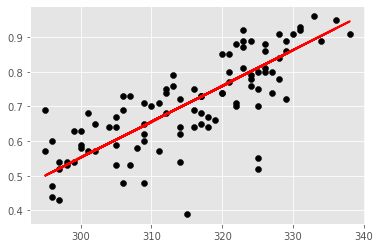

In [9]:
plt.scatter(GRE_test, admit_test, color='black')
plt.plot(GRE_test, admit_predict, color='red', linewidth=2)
plt.show()

We have some outliers, but our line is nicely centered. While visualizations like this are helpful in assessing our line of best fit, sklearn comes with some crucial metrics for linear regressions

In [10]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(admit_test, admit_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(admit_test, admit_predict))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(admit_test, admit_predict)))  


Mean Absolute Error: 0.0636984910033071
Mean Squared Error: 0.00726745943092683
Root Mean Squared Error: 0.0852493954871636


How do we make sense of the numbers above? You shoud read through [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) for formal definitions of the metrics above, but bear in mind the following:



*   We will use these metrics (particularly RMSE) to compare models to each other. The lower the value the better.
*   These values are relative to our dependent variable, i.e our dependent variable ranges from 0.39 to 0.96, with a mean of 0.7 and standard deviation of 0.13. This makes an RMSE of 0.085 somewhat acceptable. If our data ranged from 0 to 10, an RMSE of 0.085 would be incredible!

Let's see if we can improve our model by bringing in new independent variables. Let's start by plotting TOEFL scores against admission chance



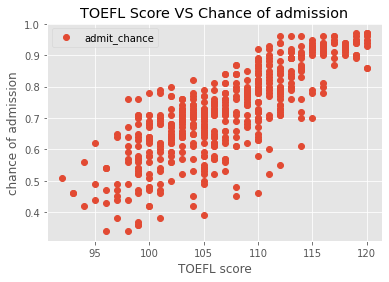

In [11]:
import matplotlib.pyplot as plt

data.plot(x='TOEFL', y='admit_chance', style='o')
plt.title('TOEFL Score VS Chance of admission')
plt.xlabel('TOEFL score')
plt.ylabel('chance of admission')
plt.show()


Once again, we can see that there is a relationship between TOEFL score and chance of admission. Let's perform a multivariate linear regression using both GRE and TOEFL scores as independent variables.

In [12]:
X = data[['GRE', 'TOEFL']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

It is interesting at this point to check the coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable

In [13]:
regressor.coef_


array([0.00641501, 0.00867603])

In this case, we can see that a single point change in your Toefl score would influence your chances slightly more than a similar 1 point change in GRE scores. 

At this point, let's compare our predicted results to the actual data from the test set:


In [14]:
y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.708793
std,0.13282,0.115286
min,0.39000,0.485892
25%,0.60000,0.618885
50%,0.70500,0.701137
75%,0.80000,0.798953
max,0.96000,0.950717


Slight improvements! This should be echoed in our key metrics being smaller than our single variable linear model

In [15]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.058487235725409016
Mean Squared Error: 0.006246893942643222
Root Mean Squared Error: 0.07903729463135249


It is now time for some challenges!

# Challenge 1

Using the same dataset, find out which of the available variables has the largest **weight** in predicting acceptance into university.



In [16]:
df = pd.read_csv("uni_admission.csv")

In [17]:
df.head()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:

df.shape
df.columns

Index(['Serial No.', 'GRE', 'TOEFL', 'uni_rating', 'SOP', 'LOR', 'CGPA',
       'publications', 'admit_chance'],
      dtype='object')

In [19]:
# Divide the data into feature and label
# x represent features and y label
X = df.iloc[:, 1:8].values
y = df['admit_chance'].values #y = data.iloc[:, 8].values 

In [20]:
#print(X)
#print(y)
X.shape


(500, 7)

In [21]:
y.shape

(500,)

In [22]:
# Divide data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Perform a regressor coefficient which will show how each independent variable
# heaviliy contributes to the dependent variable
regressor.coef_

array([0.00214141, 0.00277039, 0.00555693, 0.00051031, 0.02041338,
       0.11505398, 0.02412567])

CGPA then LOR have will influence a chance of getting admission

In [25]:
# Comparing our results to actual dataset
y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,100.00000,100.000000
mean,0.70250,0.698319
std,0.13282,0.126640
min,0.39000,0.458354
25%,0.60000,0.601047
50%,0.70500,0.682516
75%,0.80000,0.792212
max,0.96000,0.970150


In [26]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0482538937486547
Mean Squared Error: 0.004079680034602105
Root Mean Squared Error: 0.06387237301527245


In [27]:
# Perform feature scaling
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Serial No.    500 non-null    int64  
 1   GRE           500 non-null    int64  
 2   TOEFL         500 non-null    int64  
 3   uni_rating    500 non-null    int64  
 4   SOP           500 non-null    float64
 5   LOR           500 non-null    float64
 6   CGPA          500 non-null    float64
 7   publications  500 non-null    int64  
 8   admit_chance  500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [29]:
type(X_train)

numpy.ndarray

In [30]:
type(y_train)

numpy.ndarray

# Challenge 2

Take a look at this [dataset](https://drive.google.com/file/d/1cctsp46KVzNKGAK0kLl3mY6wRTDlUBp4/view?usp=sharing) on wine quality. You will have to build a multivariate model that predicts the **quality** of the wine, but with a key constraint: you may only use 4 variables from the 11 independent variables available to you. 

How can you pick the 4 most relevant independent variables? recall your learnings from module 1.

Compute your metrics, and compare with your peers. How did each of you achieve their results? 

Hint: recall reduction techniques, you want to pick independent variables that are as unrelated to each other as possible

In [31]:
wine_df = pd.read_csv('winequality.csv')
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [32]:
# preview the first few rows
wine_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [33]:
# Check the shape
wine_df.shape

(1599, 12)

In [34]:
# Check the columns names
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
# Check the data types
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [36]:
# Check for Missing values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:
# Check if there are any Not applicable values
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [38]:
# Check for duplicates
wine_df_new = wine_df.copy(deep=True)
duplicates = wine_df_new.duplicated().sum()
print(duplicates)

240


In [39]:
wine_df_new.shape

(1599, 12)

In [40]:
# Select duplicate rows except first occurrence based on all columns
duplicate_rows_df = wine_df_new[wine_df_new.duplicated()]

print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows_df)

Duplicate Rows except first occurrence based on all columns are :
      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
4               7.4             0.700         0.00  ...       0.56      9.4        5
11              7.5             0.500         0.36  ...       0.80     10.5        5
27              7.9             0.430         0.21  ...       0.91      9.5        5
40              7.3             0.450         0.36  ...       0.83     10.5        5
65              7.2             0.725         0.05  ...       0.39     10.9        5
...             ...               ...          ...  ...        ...      ...      ...
1563            7.2             0.695         0.13  ...       0.54     10.1        5
1564            7.2             0.695         0.13  ...       0.54     10.1        5
1567            7.2             0.695         0.13  ...       0.54     10.1        5
1581            6.2             0.560         0.09  ...       0.60     11.3        5

In [41]:
# Drop duplicates and keep first
wine_df_new.drop_duplicates(keep="first",inplace=True)
wine_df_new.shape

(1359, 12)

In [42]:
# Replace the white spaces between the column names with underscore
 
wine_df_new.columns = wine_df_new.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
wine_df_new.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
wine_df_new.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

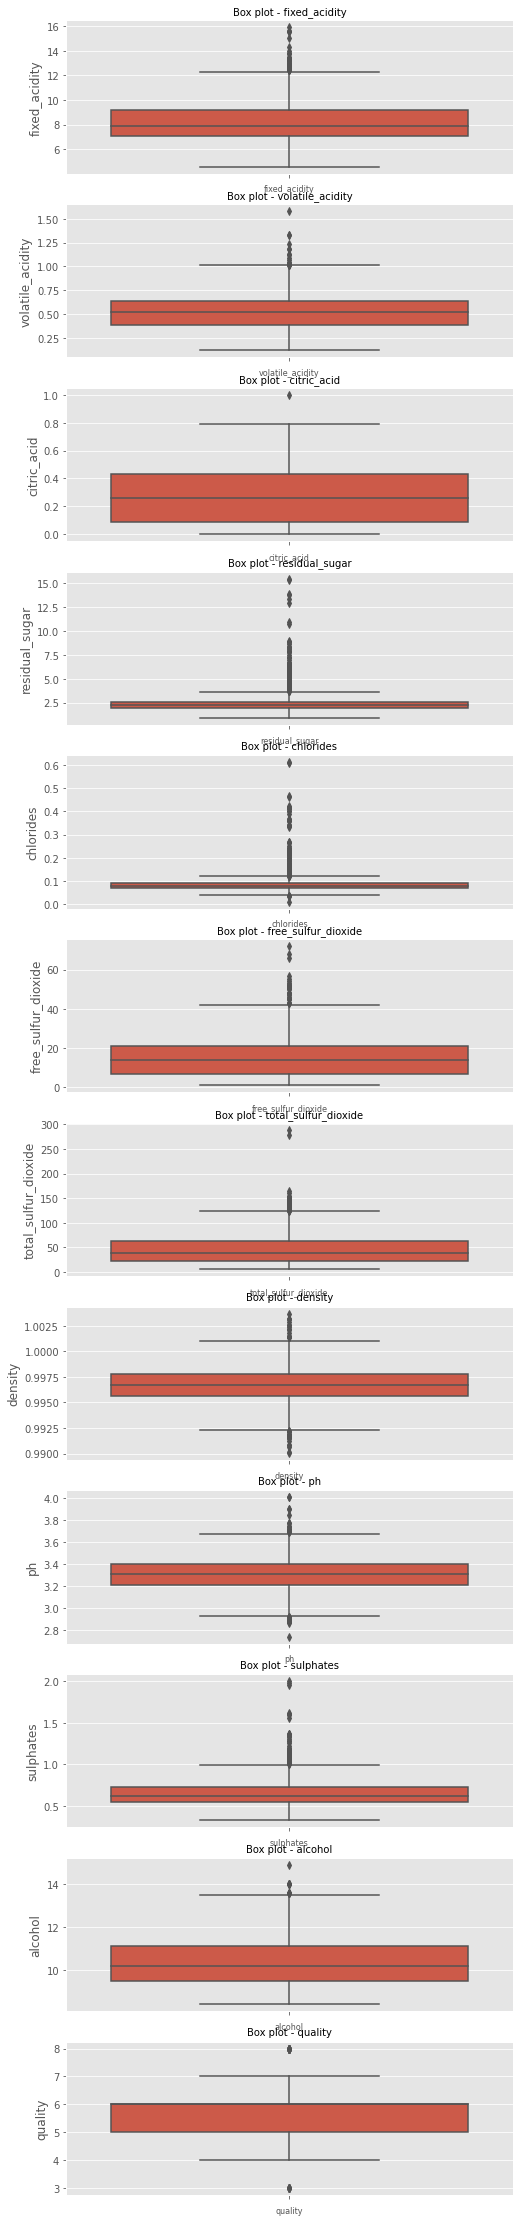

In [44]:
# Check outliers
col_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
             'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
             'ph', 'sulphates', 'alcohol', 'quality']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=wine_df_new[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [45]:
# Dropping the outliers
Q1= wine_df_new.quantile(0.25)
Q3 = wine_df_new.quantile(0.75)
IQR = Q3-Q1
IQR
wine_df_updated = wine_df_new[~((wine_df_new < (Q1 - 1.5 * IQR)) |(wine_df_new > (Q3 + 1.5 * IQR))).any(axis=1)]
wine_df_updated.shape

(1005, 12)

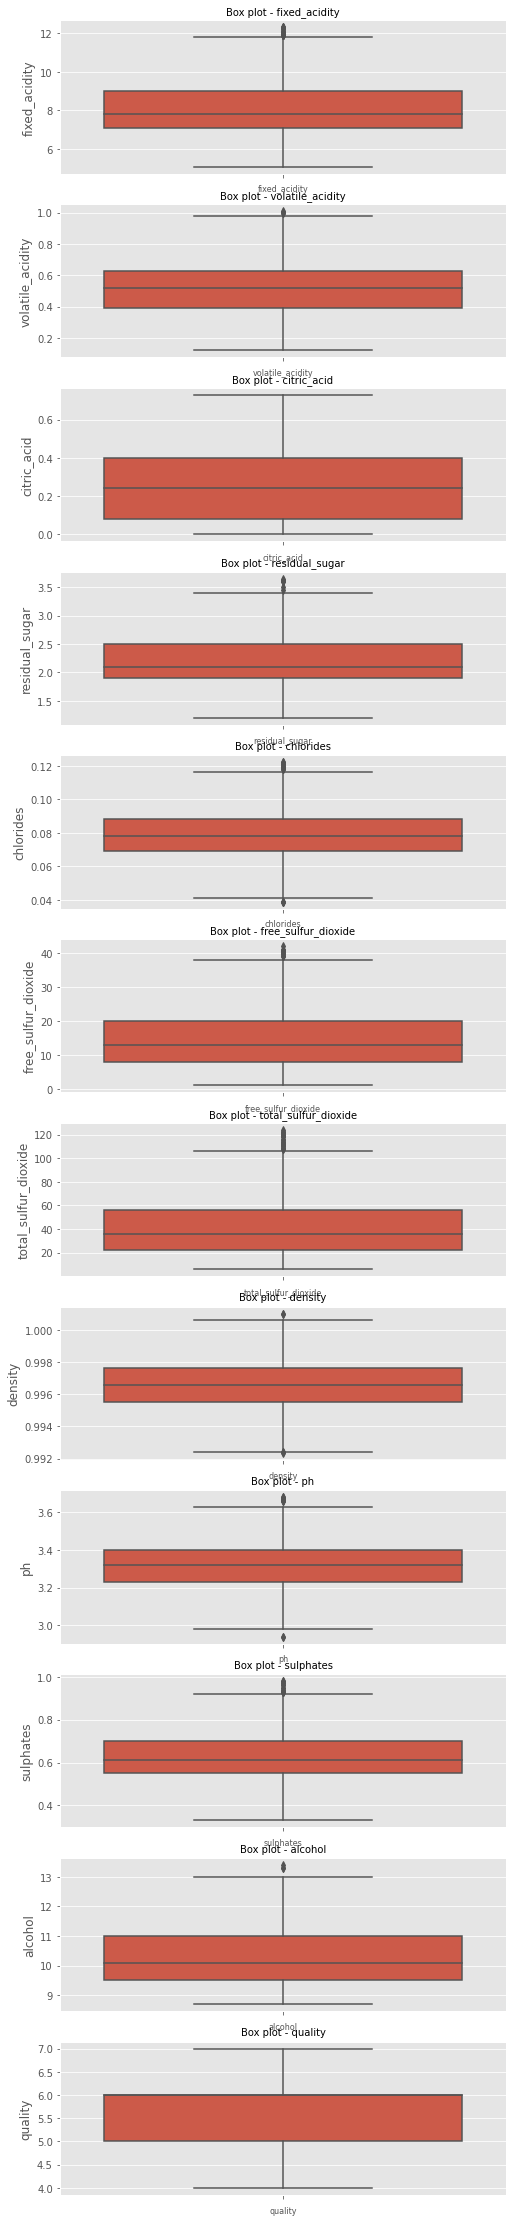

In [46]:
# Confirming if all outliers are dropped
col_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
             'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
             'ph', 'sulphates', 'alcohol', 'quality']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=wine_df_updated[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [47]:
# Drop more outliers
Q1= wine_df_updated.quantile(0.25)
Q3 = wine_df_updated.quantile(0.75)
IQR = Q3-Q1
IQR
wine_df_updated_1 = wine_df_updated[~((wine_df_updated < (Q1 - 1.5 * IQR)) |(wine_df_updated > (Q3 + 1.5 * IQR))).any(axis=1)]
wine_df_updated_1.shape

(893, 12)

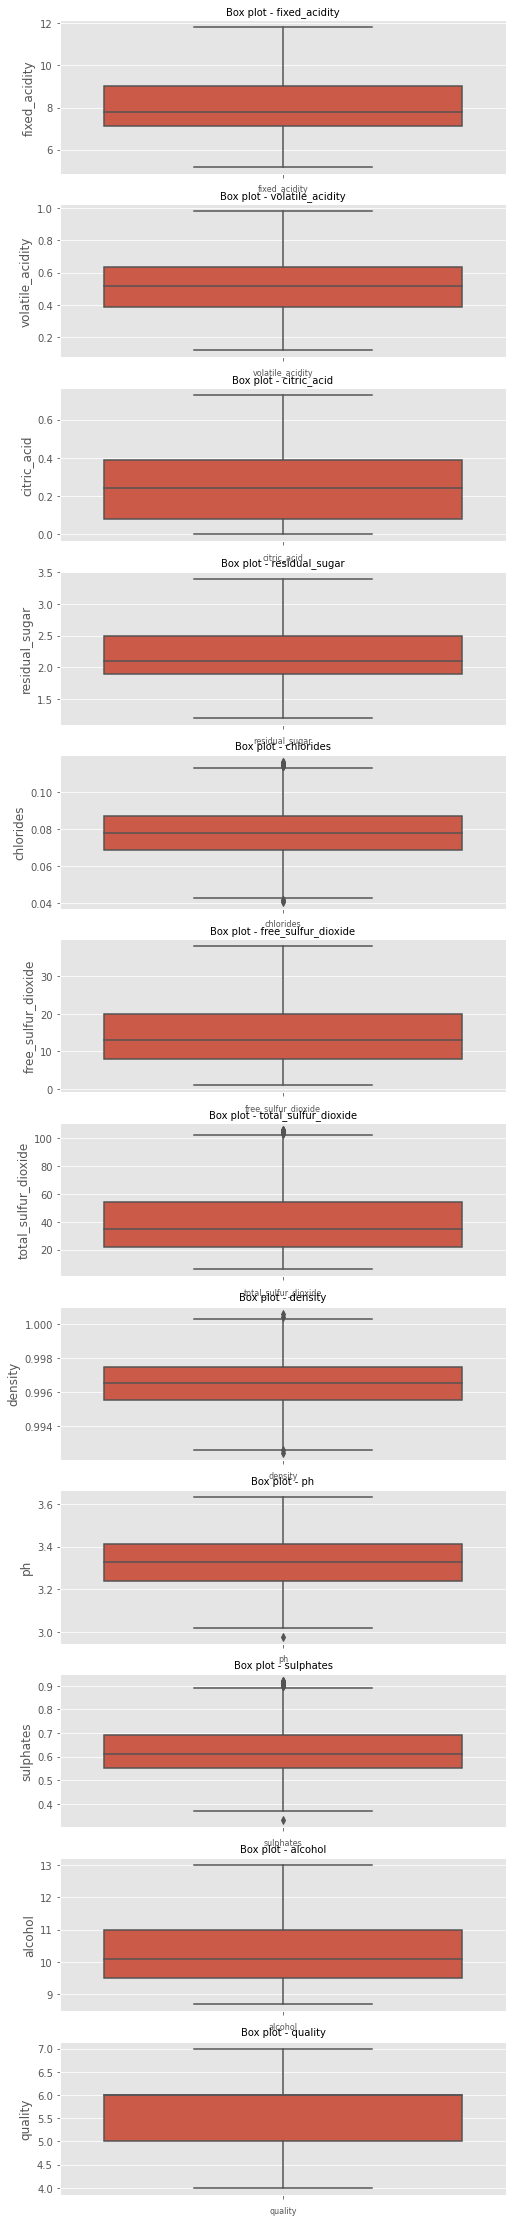

In [48]:
# Confirm if all outliers are dropped
col_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
             'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
             'ph', 'sulphates', 'alcohol', 'quality']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=wine_df_updated_1[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [49]:
# Drop more outliers
Q1= wine_df_updated_1.quantile(0.25)
Q3 = wine_df_updated_1.quantile(0.75)
IQR = Q3-Q1
IQR
wine_df_updated_2 = wine_df_updated_1[~((wine_df_updated_1 < (Q1 - 1.5 * IQR)) |(wine_df_updated_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
wine_df_updated_2.shape

(852, 12)

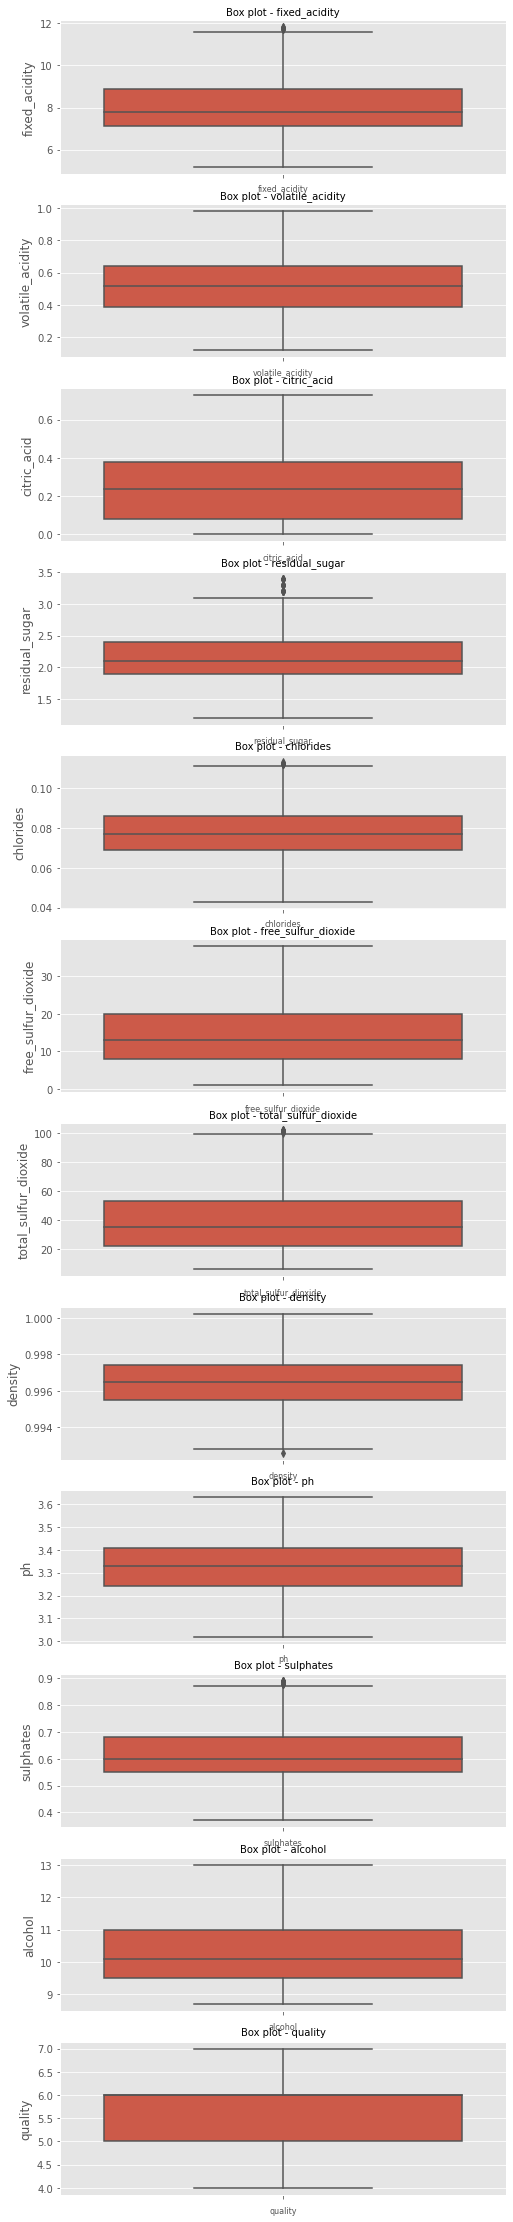

In [50]:
# Confirm if all outliers are dropped
col_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
             'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
             'ph', 'sulphates', 'alcohol', 'quality']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=wine_df_updated_2[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

## Determining our sample size

In [51]:
wine_df_updated_2.iloc[:, :12]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


## Sampling the data

In [52]:
# Use simpla random sampling to select the sample size
wine_sample = wine_df_updated_2.sample(frac=.7, replace="False")
print(wine_sample)

      fixed_acidity  volatile_acidity  citric_acid  ...  sulphates  alcohol  quality
1083            8.7             0.420         0.45  ...       0.77     12.0        6
0               7.4             0.700         0.00  ...       0.56      9.4        5
924             8.6             0.470         0.27  ...       0.80     11.2        5
748             7.2             0.500         0.18  ...       0.72      9.6        6
679            10.8             0.260         0.45  ...       0.54      9.6        5
...             ...               ...          ...  ...        ...      ...      ...
355             6.7             0.750         0.01  ...       0.61     12.8        6
1347            7.2             0.655         0.03  ...       0.39      9.5        5
1106            8.2             0.230         0.42  ...       0.54     12.3        6
1082            7.2             0.380         0.30  ...       0.59      9.5        6
416            10.6             0.480         0.64  ...       0.6

## Exploratory Data Analysis

In [53]:
# Univariate analysis
wine_sample.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,7.982718,0.528582,0.228842,2.158054,0.077314,14.647651,39.432886,0.996374,3.334765,0.615638,10.359144,5.600671
std,1.253306,0.167305,0.173889,0.429650,0.013028,8.273478,22.964361,0.001481,0.120591,0.101434,0.950830,0.694468
min,5.600000,0.160000,0.000000,1.200000,0.043000,3.000000,8.000000,0.992580,3.040000,0.370000,8.700000,4.000000
25%,7.100000,0.390000,0.077500,1.800000,0.069000,8.000000,21.000000,0.995470,3.260000,0.550000,9.500000,5.000000
50%,7.700000,0.520000,0.220000,2.100000,0.077000,13.000000,34.000000,0.996400,3.340000,0.600000,10.100000,6.000000
75%,8.700000,0.646250,0.370000,2.400000,0.086000,19.000000,53.250000,0.997400,3.410000,0.660000,11.000000,6.000000
max,11.800000,0.980000,0.690000,3.400000,0.112000,38.000000,102.000000,1.000100,3.620000,0.890000,12.900000,7.000000


In [54]:
# check the Distribution of the dataset by checking its Normality
# importing the shapiro function
from scipy.stats import shapiro 

# testing for normality
stat, p = shapiro(wine_sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.552, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


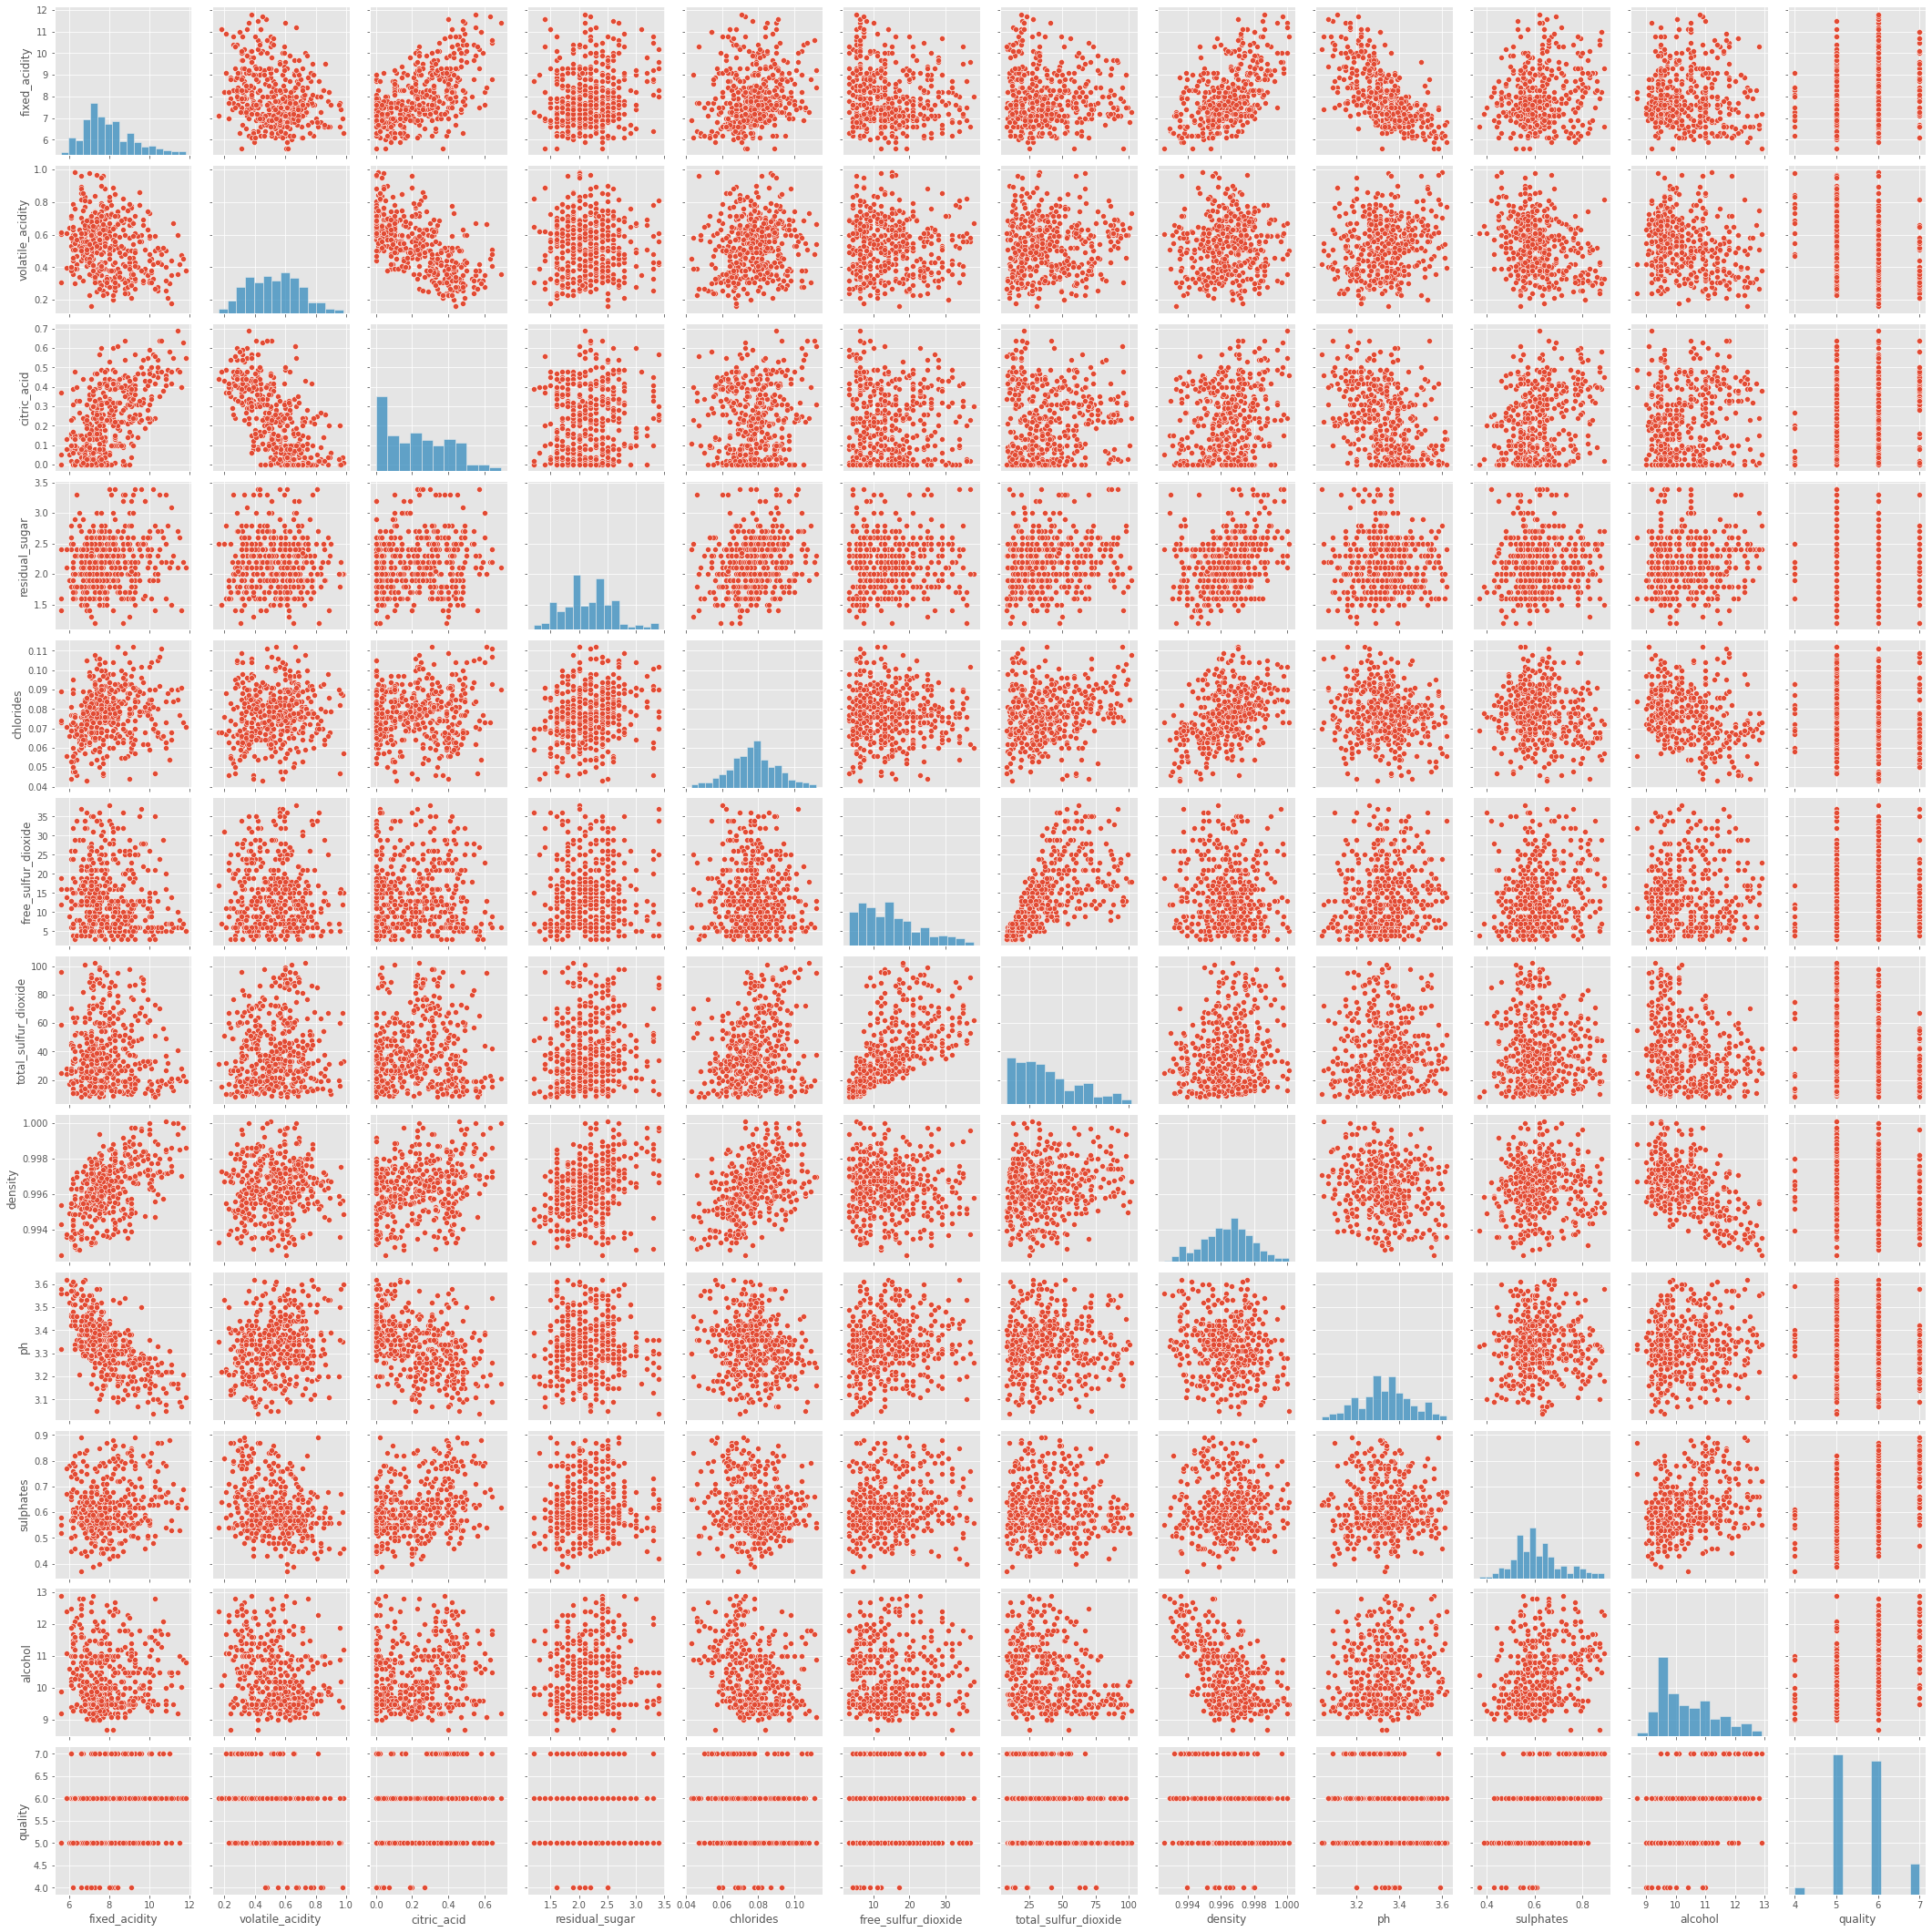

In [55]:
# Establishing correlation between variables
sns.pairplot(wine_sample);

In [79]:
# Divide dataset into features and corresponding labels
X = wine_sample.iloc[:, 0:12].values
y = wine_sample.iloc[:, -1].values

In [80]:
# Divide data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
# Find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# Determine the slope
print(regressor.intercept_)

1.5187850976872141e-13


In [82]:
# Find the regression coefficient
regressor.coef_

array([ 2.53013747e-16,  2.12330153e-15, -1.66880398e-15,  2.23345648e-16,
        1.86852758e-15,  1.17961196e-16, -3.46944695e-17, -1.56637890e-13,
        2.45463372e-16,  1.87832605e-15, -2.60859043e-16,  1.00000000e+00])

It is evident that increase in 'citric_acid', 'total_sulfur_dioxide', 'density' and 'alcohol' content will reduce the quality of wine as they all have negative correlation values.

In [86]:
wine_sample.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [60]:
# Comparing our results to actual dataset
y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,120.000000,120.000000
mean,5.650000,5.650000
std,0.717723,0.717723
min,4.000000,4.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,6.000000,6.000000
max,7.000000,7.000000


In [61]:
# Determine the MAE, MSE, RMSE
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.734553738221924e-16
Mean Squared Error: 1.1487786932280985e-30
Root Mean Squared Error: 1.07181094099104e-15


In [70]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
# Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [72]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [73]:
# Evaluating the Performance
# with the help of a confusion matrix and find the accuracy of the prediction.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[ 3  0  0  0]
 [ 0 50  0  0]
 [ 0  0 53  0]
 [ 0  0  0 14]]
Accuracy1.0


With one linear discriminant, the algorithm achieved an accuracy of 100%. 

In [68]:
wine_sample.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
1083,8.7,0.42,0.45,2.4,0.072,32.0,59.0,0.99617,3.33,0.77,12.0,6
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
924,8.6,0.47,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2,5
748,7.2,0.50,0.18,2.1,0.071,12.0,31.0,0.99761,3.52,0.72,9.6,6
679,10.8,0.26,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6,5


In [69]:
# Divide the resultant dataset into training and test sets